## Importing Modules and Drive (For Dataset)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
purchase_df = pd.read_csv("/content/drive/MyDrive/Internship/ignosis/purchase_behaviour.csv")
transaction_df = pd.read_csv("/content/drive/MyDrive/Internship/ignosis/transaction_data.csv")

## Basic EDA

In [ ]:
purchase_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
purchase_df.describe(include='object')

,LIFESTAGE,PREMIUM_CUSTOMER
count,72637,72637
unique,7,3
top,RETIREES,Mainstream
freq,14805,29245


In [ ]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


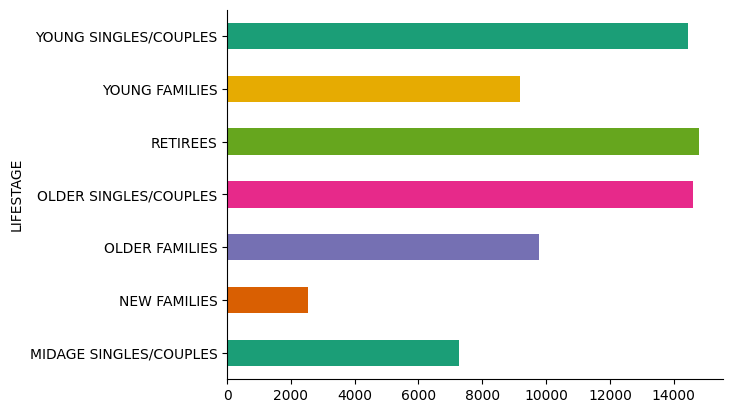

In [ ]:
purchase_df.groupby('LIFESTAGE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

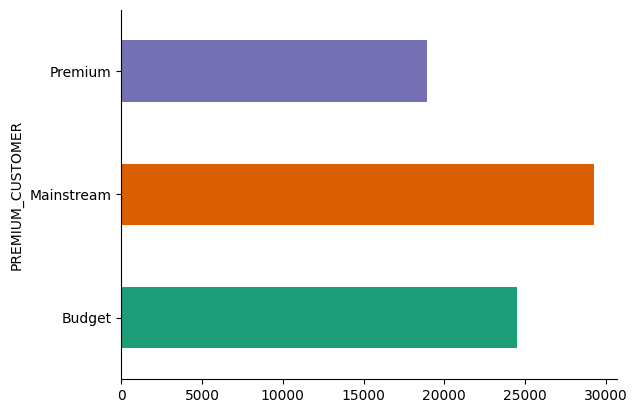

In [ ]:
purchase_df.groupby('PREMIUM_CUSTOMER').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

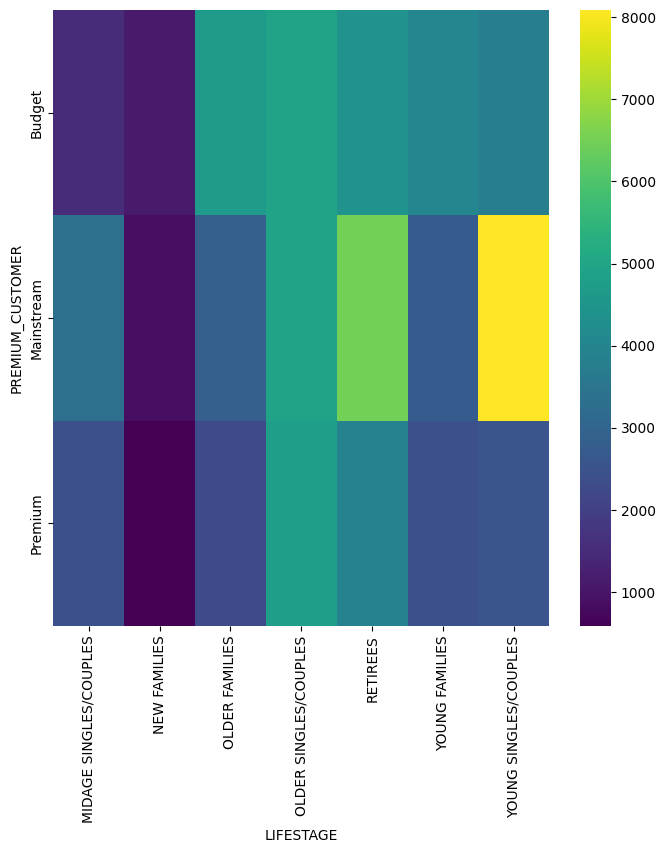

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['PREMIUM_CUSTOMER'].value_counts()
    for x_label, grp in purchase_df.groupby('LIFESTAGE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('LIFESTAGE')
_ = plt.ylabel('PREMIUM_CUSTOMER')

In [ ]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [ ]:
transaction_df.describe(include='object')

,PROD_NAME
count,264836
unique,114
top,Kettle Mozzarella Basil & Pesto 175g
freq,3304


In [ ]:
transaction_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


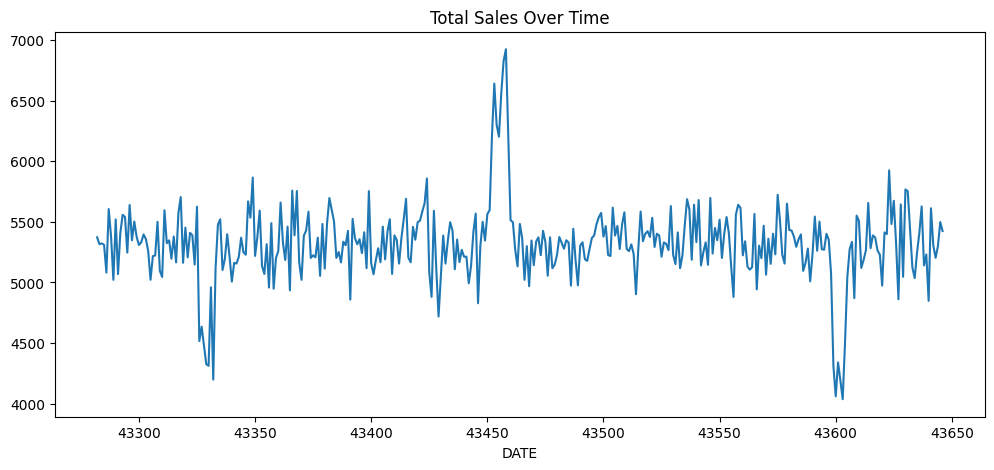

In [ ]:
transaction_df.groupby('DATE')['TOT_SALES'].sum().plot(figsize=(12, 5), title="Total Sales Over Time")
plt.show()

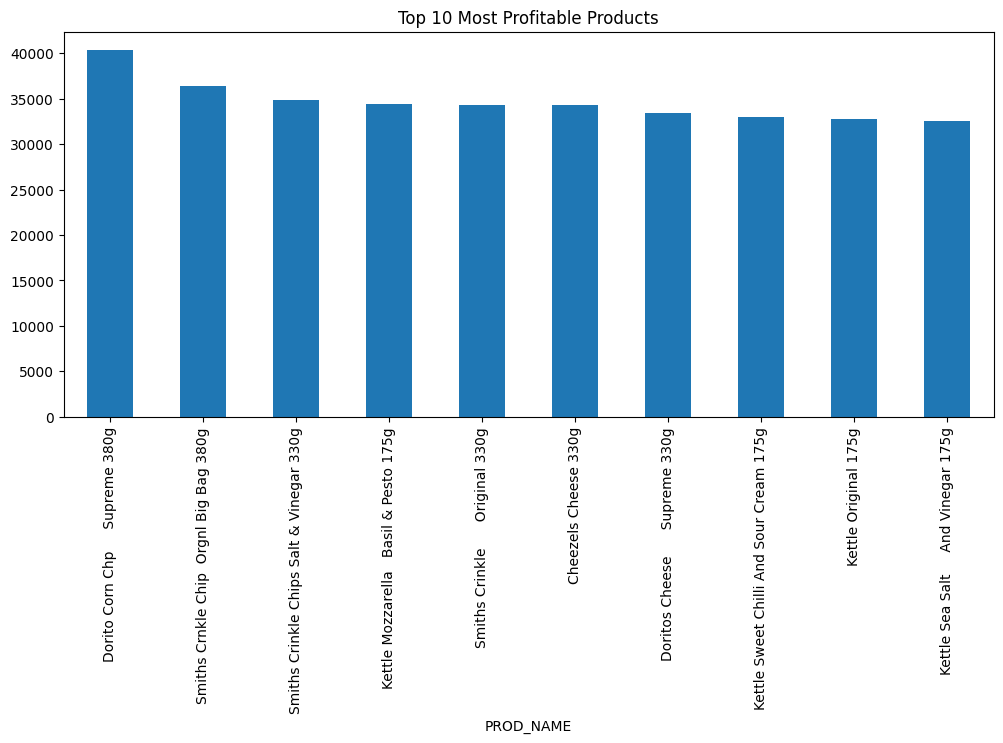

In [ ]:
top_products = transaction_df.groupby('PROD_NAME')['TOT_SALES'].sum().nlargest(10)
top_products.plot(kind='bar', title="Top 10 Most Profitable Products", figsize=(12, 5))
plt.show()

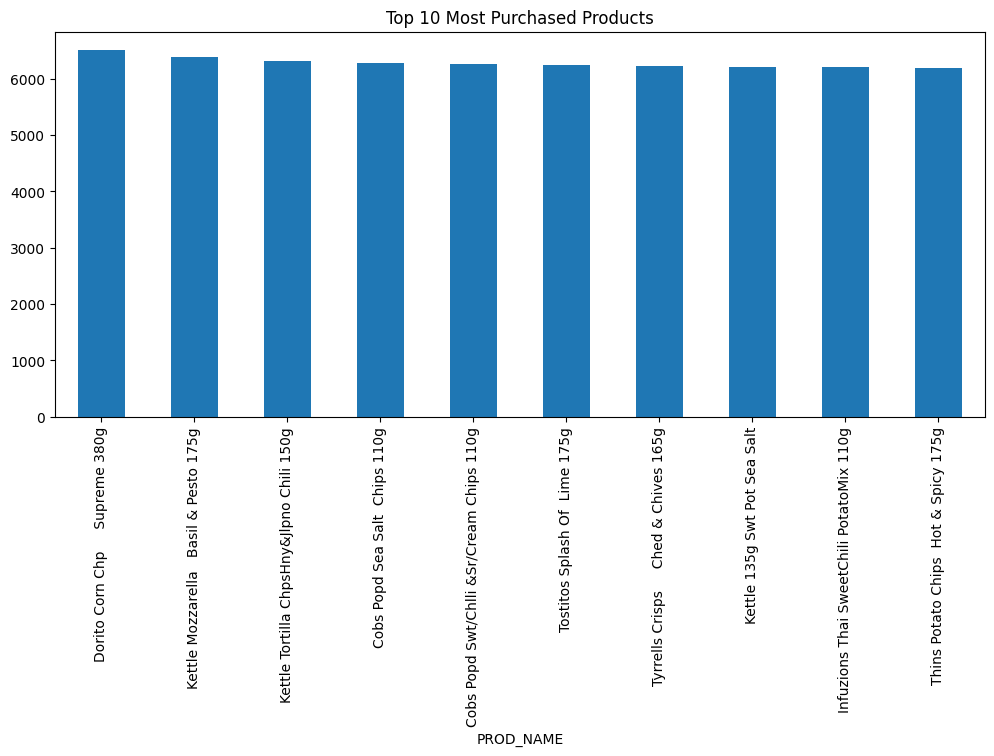

In [ ]:
top_products_qty = transaction_df.groupby('PROD_NAME')['PROD_QTY'].sum().nlargest(10)
top_products_qty.plot(kind='bar', title="Top 10 Most Purchased Products", figsize=(12, 5))
plt.show()

## Merging Datasets and Performing Analysis

In [ ]:
merged_df = transaction_df.merge(purchase_df, on="LYLTY_CARD_NBR", how="left")

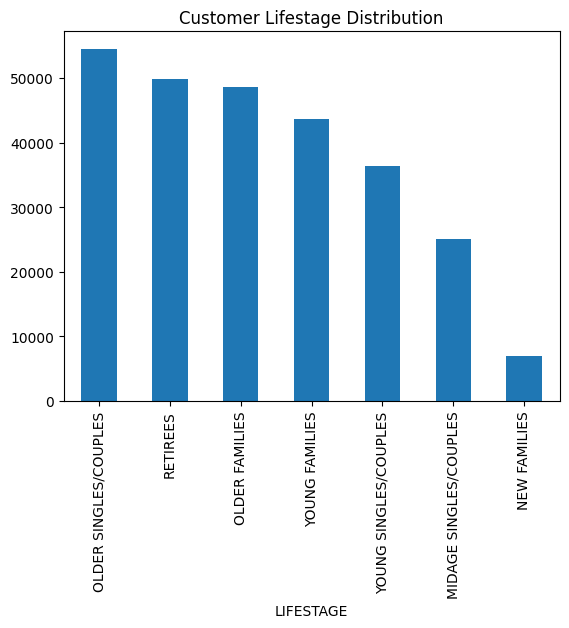

In [ ]:
merged_df['LIFESTAGE'].value_counts().plot(kind='bar', title="Customer Lifestage Distribution")
plt.show()

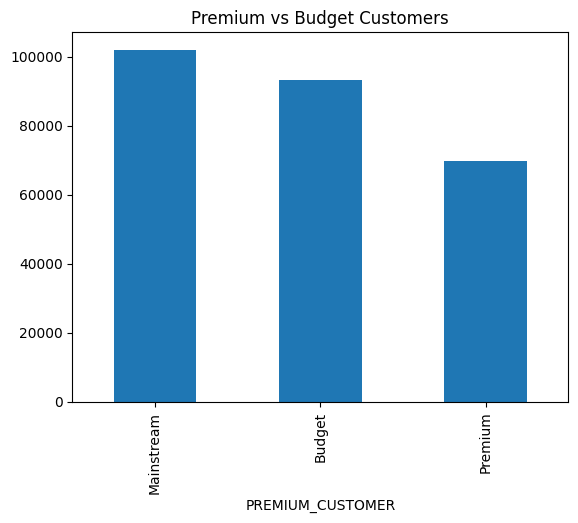

In [ ]:
merged_df['PREMIUM_CUSTOMER'].value_counts().plot(kind='bar', title="Premium vs Budget Customers")
plt.show()

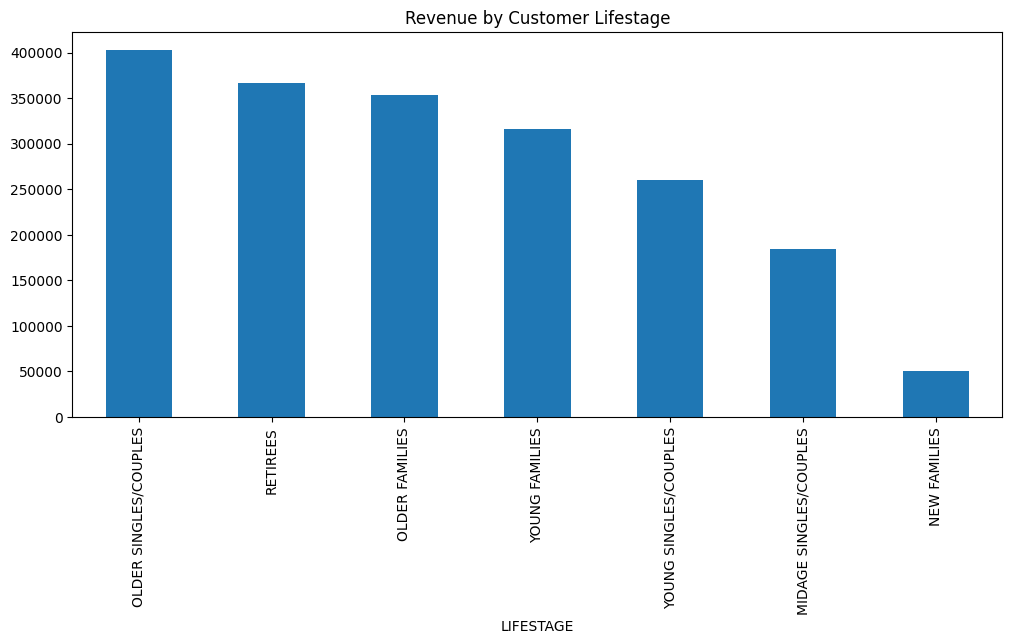

In [ ]:
lifestage_sales = merged_df.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending=False)
lifestage_sales.plot(kind='bar', title="Revenue by Customer Lifestage", figsize=(12, 5))
plt.show()

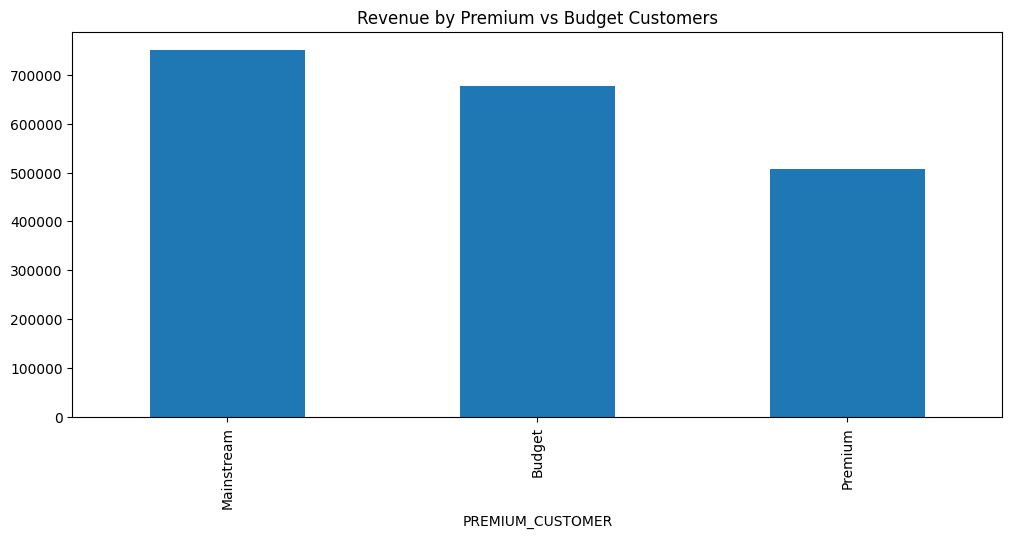

In [ ]:
premium_sales = merged_df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().sort_values(ascending=False)
premium_sales.plot(kind='bar', title="Revenue by Premium vs Budget Customers", figsize=(12, 5))
plt.show()

In [ ]:
loyal_customers = merged_df.groupby('LYLTY_CARD_NBR').agg({'TOT_SALES': 'sum', 'TXN_ID': 'count'})
loyal_customers.columns = ['Total_Spend', 'Transaction_Count']

In [ ]:
loyal_customers.sort_values(by='Transaction_Count', ascending=False).head(10)

,Total_Spend,Transaction_Count
LYLTY_CARD_NBR,,
162039,126.8,18
172032,120.1,18
13138,109.0,17
116181,117.6,17
128178,99.7,17
230078,138.6,17
105026,114.2,16
129050,93.5,16
109036,113.0,16


In [ ]:
loyal_customers.sort_values(by='Total_Spend', ascending=False).head(10)

,Total_Spend,Transaction_Count
LYLTY_CARD_NBR,,
226000,1300.00,2
230078,138.60,17
63197,132.80,15
259009,127.20,15
162039,126.80,18
58361,124.80,14
230154,124.40,14
94185,122.80,16
130090,122.65,14


In [ ]:
top_profitable_products = (
    transaction_df.groupby("PROD_NAME")["TOT_SALES"]
    .sum()
    .nlargest(3)
    .reset_index()
)

print("Top 3 Most Profitable Products:")
print(top_profitable_products)

Top 3 Most Profitable Products:
                                  PROD_NAME  TOT_SALES
0          Dorito Corn Chp     Supreme 380g    40352.0
1    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
2  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


In [ ]:
loyal_customers = (
    merged_df.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"])
    .agg({"TOT_SALES": "sum", "TXN_ID": "count"})
    .reset_index()
)

loyal_customers = loyal_customers.sort_values(by="TXN_ID", ascending=False)
print(loyal_customers.head(10))

       LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES  \
42813          162039         OLDER FAMILIES       Mainstream      126.8   
45905          172032  YOUNG SINGLES/COUPLES       Mainstream      120.1   
3686            13138         YOUNG FAMILIES       Mainstream      109.0   
31654          116181         YOUNG FAMILIES          Premium      117.6   
34943          128178         OLDER FAMILIES       Mainstream       99.7   
60925          230078         OLDER FAMILIES           Budget      138.6   
28605          105026         YOUNG FAMILIES           Budget      114.2   
35061          129050         YOUNG FAMILIES          Premium       93.5   
29617          109036  OLDER SINGLES/COUPLES          Premium      113.0   
59107          222242         OLDER FAMILIES       Mainstream      109.2   

       TXN_ID  
42813      18  
45905      18  
3686       17  
31654      17  
34943      17  
60925      17  
28605      16  
35061      16  
29617      16  
591

In [ ]:
loyalty_by_lifestage = loyal_customers["LIFESTAGE"].value_counts()
print("Loyal Customers by Lifestage:")
print(loyalty_by_lifestage)

loyalty_by_premium = loyal_customers["PREMIUM_CUSTOMER"].value_counts()
print("Loyal Customers by Premium/Budget:")
print(loyalty_by_premium)

Loyal Customers by Lifestage:
LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64
Loyal Customers by Premium/Budget:
PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64


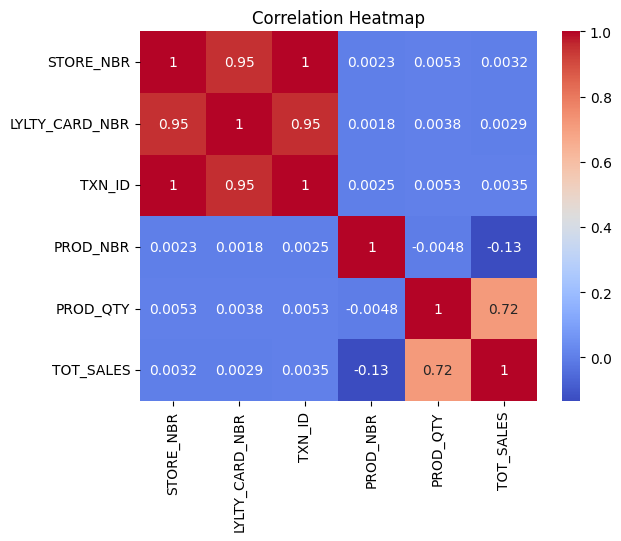

In [ ]:
sns.heatmap(merged_df.drop(columns=['PROD_NAME', 'LIFESTAGE', 'PREMIUM_CUSTOMER', 'DATE']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Summary of Analysis

### Top 3 Most Profitable Products:

1.   Dorito Corn Chip Supreme 380g - ₹40,352
2.   Smiths Crinkle Chip Original Big Bag 380g - ₹36,367.6
3.   Smiths Crinkle Chips Salt & Vinegar 330g - ₹34,804.2

These products generate the highest revenue, indicating strong consumer preference.

### Most Loyal Customers (Highest Transactions & Total Spend):

*   Customers with the highest transaction count have spent between ₹93.5 - ₹138.6, with up to 18 transactions.
*   Customers with the highest spend per transaction (e.g., ₹1300 in 2 transactions) may be bulk buyers.
*   Frequent buyers belong to older families, older singles/couples, and young families.

### Loyalty Trends By Lifestage:

*   Most frequent buyers: Retirees, Older Singles/Couples, Young Singles/Couples.
*   Least frequent buyers: New Families.

### Loyalty Trends By Spending Behavior:

*   Mainstream customers form the largest segment (29,245 buyers), followed by Budget (24,470) and Premium (18,922) buyers.
*   Older families and older singles/couples show strong loyalty, aligning with their high spending potential.

### Key Insights & Hypothesis

1.  Popular Products Are Snack-Based:

   *   The top-selling products are chips, indicating high demand for snacks.
   *   Customers likely prefer familiar brands and bulk packaging.

2.  Older and Retired Customers Drive Loyalty:

   *   Older customers (Retirees, Older Singles/Couples) shop more frequently.
   *   They might have habitual preferences and a stable budget for snacks.

3.  Mainstream and Budget Customers Dominate:

   *   Mainstream buyers are the majority, meaning pricing and promotions should target affordability.
   *   Premium customers are fewer, but their purchase behavior suggests brand loyalty.

### Actionable Recommendations

*   Optimize Marketing for Older and Retired Customers

   *   Design loyalty programs and discounts for frequent buyers.
   *   Personalize marketing for Older Families and Singles/Couples.

*   Stock and Promote Bestseller Products

   *   Prioritize inventory for Doritos and Smiths Chips.
   *   Offer bundle discounts on these products.

*   Segment Pricing Strategies

   *   Budget and Mainstream buyers respond to price-based promotions.
   *   Premium buyers should be targeted with exclusive or healthier snack options.

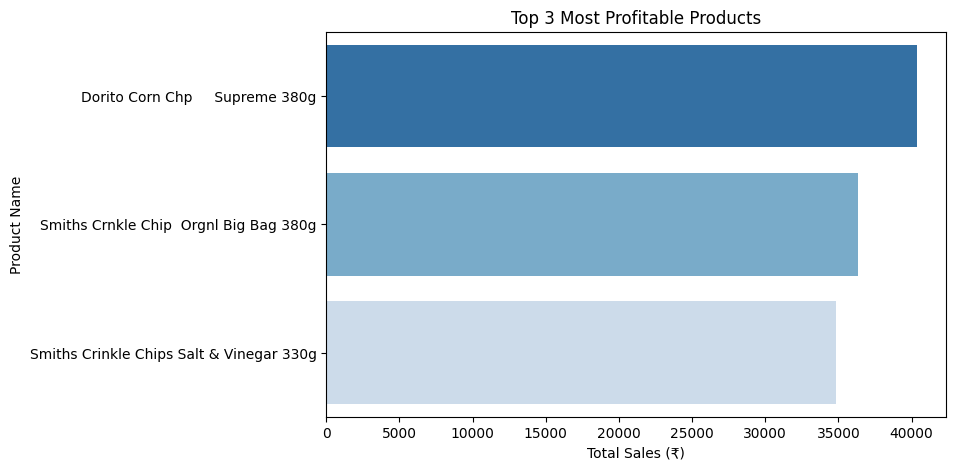

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    y=top_profitable_products["PROD_NAME"],
    x=top_profitable_products["TOT_SALES"],
    palette="Blues_r"
)
plt.xlabel("Total Sales (₹)")
plt.ylabel("Product Name")
plt.title("Top 3 Most Profitable Products")
plt.show()

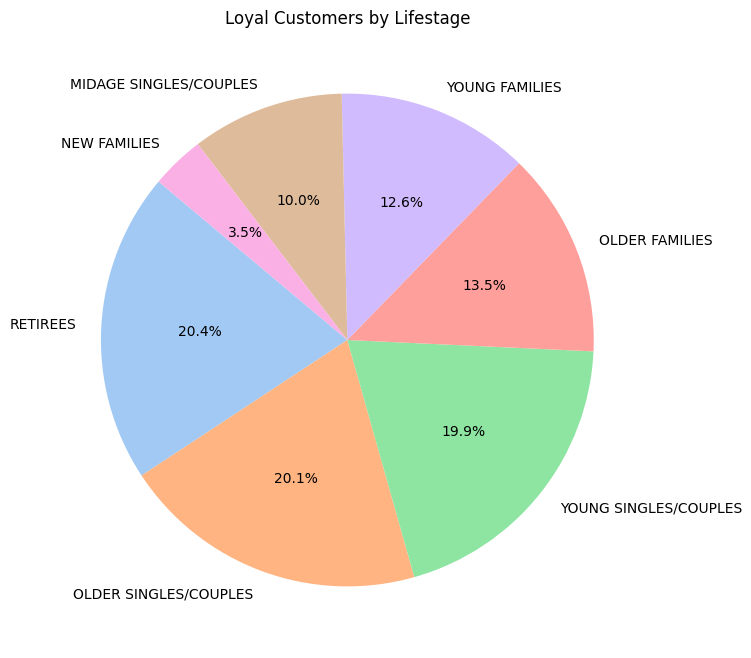

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(
    loyalty_by_lifestage,
    labels=loyalty_by_lifestage.index,
    autopct="%1.1f%%",
    colors=sns.color_palette("pastel"),
    startangle=140
)
plt.title("Loyal Customers by Lifestage")
plt.show()

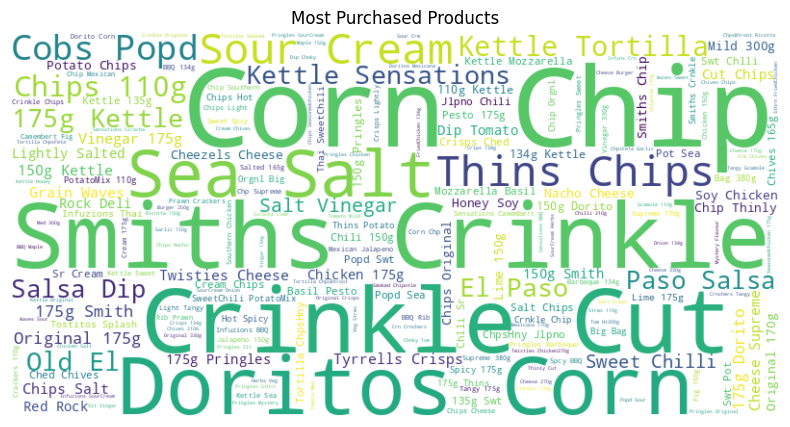

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    width=800, height=400, background_color="white"
).generate(" ".join(transaction_df["PROD_NAME"]))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Purchased Products")
plt.show()